In [1]:
import csv
#import cv2

import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import PIL
import numpy as np
#import matplotlib as mpl
import random
#mpl.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution2D, Lambda, Cropping2D
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
from scipy import misc
from scipy.ndimage import rotate
from skimage import transform
from skimage.transform import warp, SimilarityTransform, AffineTransform
from skimage import exposure

Using TensorFlow backend.


In [2]:
from PIL import Image

In [3]:
import os 
from os import listdir
import glob
import pandas as pd
from io import BytesIO
import base64

In [4]:
os.chdir("30D_1/New directory/Img/")

In [5]:
filenames = [img for img in glob.glob("*.png")]

In [6]:
import re
tokenize = re.compile(r'(\d+)|(\D+)').findall
def natural_sortkey(string):          
    return tuple(int(num) if num else alpha for num, alpha in tokenize(string))

files = sorted(filenames, key=natural_sortkey)

files

['30D_9_1.png',
 '30D_9_2.png',
 '30D_9_3.png',
 '30D_9_4.png',
 '30D_9_5.png',
 '30D_9_6.png',
 '30D_9_7.png',
 '30D_9_8.png',
 '30D_9_9.png',
 '30D_9_10.png',
 '30D_9_11.png',
 '30D_9_12.png',
 '30D_9_13.png',
 '30D_9_14.png',
 '30D_9_15.png',
 '30D_9_16.png',
 '30D_9_17.png',
 '30D_9_18.png',
 '30D_9_19.png',
 '30D_9_20.png',
 '30D_9_21.png',
 '30D_9_22.png',
 '30D_9_23.png',
 '30D_9_24.png',
 '30D_9_25.png',
 '30D_9_26.png',
 '30D_9_27.png',
 '30D_9_28.png',
 '30D_9_29.png',
 '30D_9_30.png',
 '30D_9_31.png',
 '30D_9_32.png',
 '30D_9_33.png',
 '30D_9_34.png',
 '30D_9_35.png',
 '30D_9_36.png',
 '30D_9_37.png',
 '30D_9_38.png',
 '30D_9_39.png',
 '30D_9_40.png',
 '30D_9_41.png',
 '30D_9_42.png',
 '30D_9_43.png',
 '30D_9_44.png',
 '30D_9_45.png',
 '30D_9_46.png',
 '30D_9_47.png',
 '30D_9_48.png',
 '30D_9_49.png',
 '30D_9_50.png',
 '30D_9_51.png',
 '30D_9_52.png',
 '30D_9_53.png',
 '30D_9_54.png',
 '30D_9_55.png',
 '30D_9_56.png',
 '30D_9_57.png',
 '30D_9_58.png',
 '30D_9_59.png',
 '30D_

In [7]:
labels = pd.read_csv("../30D_9.csv")

In [8]:
image = mpimg.imread(files[0])

In [9]:
images = []
for i in range(len(files)):
    images.append(mpimg.imread(files[i]))

In [10]:
labels["strain"]

0      0.000377
1      0.000592
2      0.000774
3      0.000891
4      0.001091
         ...   
558    0.120700
559    0.120900
560    0.121200
561    0.121500
562    0.121700
Name: strain, Length: 563, dtype: float64

In [11]:
X_train = np.array(images)
y_train = np.array(labels["strain"])

In [12]:
files[1]


'30D_9_2.png'

In [13]:
model = Sequential()
#model.add(Lambda(lambda x: (x/255.0)-0.5, input_shape = (231, 231, 4)))

#The architecture is similar to NVIDIA architecture. It starts with convolutional layers that have 
#24, 36 and 48 , 5x5 filters respectively in the first 3 layers and a stride of 2 in both the directions.
#These layers are followed by two convolutional layers each having 64 3x3 filters with strides of 1
#in both the directions. Exponential Linear Unit activation function is used in all the five convolutional
#layers. A maxpooling layer follows. The layer is flattened and fed into four fully connected layers with
#first two having ELU activation. Dropout is applied in each layer after the first one with a probability of
#retaining the weights equal to 0.5. It was also realized that maxpooling layers take a long time
model.add(Convolution2D(24,(2,2), padding = 'valid', strides = (2,2), activation='elu'))
model.add(Convolution2D(36,(2,2), padding = 'valid', strides = (2,2), activation='elu'))
model.add(Convolution2D(48,(3,3), padding = 'valid', strides = (2,2), activation='elu'))
model.add(Convolution2D(64,(3,3), padding = 'valid', strides = (1,1), activation='elu'))
model.add(Convolution2D(64,(3,3), padding = 'valid', strides = (1,1), activation='elu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(50, activation = 'elu'))
model.add(Dropout(0.5))
model.add(Dense(25))
model.add(Dropout(0.5))
model.add(Dense(1))

In [14]:
adam = optimizers.Adam(lr=0.001)
#model.compile(loss='mean_squared_error', optimizer=sgd)
model.compile(loss = 'mse', optimizer = adam)    #mse is used here instead of a cross entropy function because it is a regression and not a classification
hist = model.fit(X_train, y_train, batch_size = 20, validation_split = 0.25, shuffle = True, epochs = 30)

#model.save('model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 422 samples, validate on 141 samples
Epoch 1/30
422/422 [==============================] - 7s 17ms/step - loss: 6.0856 - val_loss: 0.0769
Epoch 2/30
422/422 [==============================] - 8s 18ms/step - loss: 0.9312 - val_loss: 0.0155
Epoch 3/30
422/422 [==============================] - 8s 18ms/step - loss: 0.1363 - val_loss: 0.0030
Epoch 4/30
422/422 [==============================] - 7s 17ms/step - loss: 0.0698 - val_loss: 0.0156
Epoch 5/30
422/422 [==============================] - 7s 17ms/step - loss: 0.0237 - val_loss: 0.0056
Epoch 6/30
422/422 [==============================] - 6s 15ms/step - loss: 0.0177 - val_loss: 0.0075
Epoch 7/30
422/422 [==============================] - 7s 16ms/step - loss: 0.0193 - val_loss: 0.0254
Epoch 8/30
422/422 [==============================] - 8s 18ms/step - loss: 0.0184 - val_loss: 0.0030
Epoch 9/30
422/422 [======

In [15]:
#print(hist.history)
train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']


In [16]:
predicted_strain = []
l = []
for i in range(len(files)):
    image = images[i]
    image = np.expand_dims(image, axis=0)
    k = (model.predict(image))
    l.append(k[0][0])

In [17]:
print(l)

[0.02620006, 0.016982473, 0.06887112, 0.054027963, 0.074115895, -0.015189354, 0.023975018, 0.0086273225, 0.021711726, 0.034539457, 0.028732337, -0.023225505, 0.032495696, 0.05428096, 0.031552806, 0.0458165, 0.013643554, -0.0046371594, 0.047948312, -0.0119558005, 0.009084213, 0.00817213, 0.04123783, 0.0056105107, 0.0028673606, 0.0075758738, 0.0105186505, 0.025682528, 0.019639049, 0.034273453, 0.009876426, 0.031852297, 0.005789252, -0.0018999414, 0.014687292, 0.032335937, 0.0031865046, 0.0136896605, 0.015366543, 0.010470012, 0.005701673, 0.012110692, -0.003574354, 0.011806754, 0.05961527, 0.026344538, -9.702751e-06, 0.046699744, 0.011281458, -0.030224126, 0.008144226, 0.017471794, 0.03741478, 0.0001758628, 0.009293816, 0.03078841, 0.0047449316, 0.057721976, 0.005825935, 0.050545655, 0.018839955, 0.034179132, 0.021750454, 0.0059757484, 0.028588895, -0.0053951144, 0.022101559, 0.011826852, 0.0026266414, 0.031327, 0.031844553, -0.015087207, 0.017309334, 0.016632624, 0.01577015, 0.033668324,

In [18]:
k = np.asarray(labels["strain"][220:320])

In [19]:
k

array([0.01957, 0.01965, 0.01973, 0.01982, 0.01991, 0.02001, 0.0201 ,
       0.02019, 0.02029, 0.02038, 0.02047, 0.02057, 0.02066, 0.02076,
       0.02084, 0.02092, 0.021  , 0.02108, 0.02117, 0.02125, 0.02133,
       0.02141, 0.02148, 0.02157, 0.02166, 0.02174, 0.02182, 0.0219 ,
       0.02197, 0.02205, 0.02213, 0.02221, 0.02229, 0.02236, 0.02245,
       0.02254, 0.0226 , 0.02268, 0.02276, 0.02284, 0.02291, 0.02298,
       0.02305, 0.02312, 0.02318, 0.02325, 0.02333, 0.02341, 0.02348,
       0.02355, 0.02362, 0.0237 , 0.02377, 0.02384, 0.02392, 0.02399,
       0.02406, 0.02413, 0.0242 , 0.02427, 0.02435, 0.02443, 0.02452,
       0.02459, 0.02466, 0.02474, 0.02482, 0.02489, 0.02498, 0.02506,
       0.02514, 0.02524, 0.02531, 0.02537, 0.02543, 0.0255 , 0.02556,
       0.02565, 0.02573, 0.02581, 0.02588, 0.02594, 0.02601, 0.02609,
       0.02617, 0.02623, 0.02629, 0.02635, 0.02641, 0.02649, 0.02655,
       0.0266 , 0.02666, 0.02672, 0.02678, 0.02689, 0.02706, 0.02718,
       0.02733, 0.02

Text(0.5, 1.0, 'Actual and predicted value of strain')

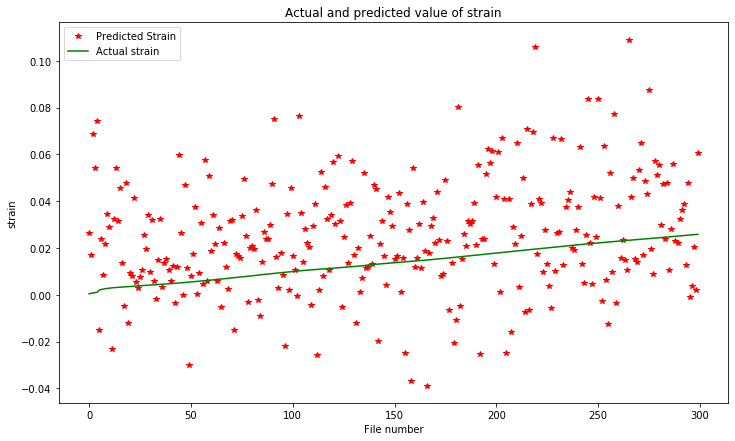

In [22]:
plt.figure(figsize=(12,7))

plt.xlabel("File number")
plt.ylabel("strain")
plt.plot( l[0:300], 'r*', label='Predicted Strain')
plt.plot(labels["strain"][0:300],"g",label = "Actual strain")
plt.legend()
plt.title('Actual and predicted value of strain')


<Figure size 720x720 with 0 Axes>

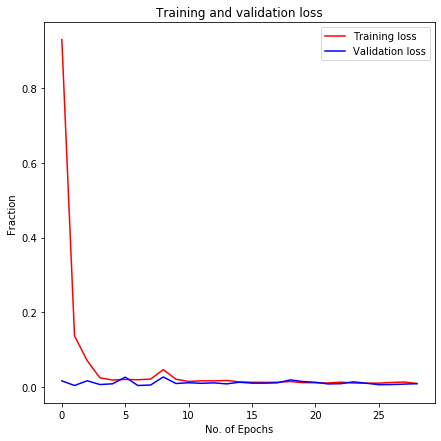

<Figure size 720x720 with 0 Axes>

In [21]:
#print(hist.history)
train_loss = hist.history['loss'][1:]
val_loss   = hist.history['val_loss'][1:]

plt.figure(figsize=(7,7))
epochs = range(len(val_loss))
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Fraction")
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure(figsize=(10,10))